In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
counter =Counter()

analyzer = SentimentIntensityAnalyzer()

In [2]:
consumer_key = "I5gAMSMbh7nc6YmrOxFqWQ46m"
consumer_secret = "1wiAlYw8McJvElyvyM7rRnXDpLYCuwdAsCwX4NZ36o8SE5Kdix"
access_token = "1009110213838770177-cSSF0zi2Xf1H1r7rOzBm4NVIakecyU"
access_token_secret = "YDd2Ta1fkFSJKPCRZkkYTKKAjBdPjvc9mltAdjT7ddqH3"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
tweets = []
sentiments=[]
news_list = ['@BBC', '@CBS', '@CNN', '@Fox', '@NYTmag']
list_news = []

In [4]:
for news in news_list:
    for status in tweepy.Cursor(api.user_timeline, id=news).items(100):
        list_news.append(news)
        tweets.append(status)

In [5]:
df = pd.DataFrame([x._json for x in tweets])
df['sources'] = pd.Series(list_news)

In [6]:
df['compound']= df.text.map(lambda x: analyzer.polarity_scores(x)['compound'])
df['positive'] = df.text.map(lambda x: analyzer.polarity_scores(x)['pos'])
df['negative'] = df.text.map(lambda x: analyzer.polarity_scores(x)['neg'])
df['neutral'] = df.text.map(lambda x: analyzer.polarity_scores(x)['neu'])

In [7]:
df.to_csv('Sentiment.csv')

In [8]:
df_bbc = df.iloc[0:100]
df_cbs = df.iloc[100:200]
df_cnn = df.iloc[200:300]
df_fox = df.iloc[300:400]
df_nymag = df.iloc[400:500]

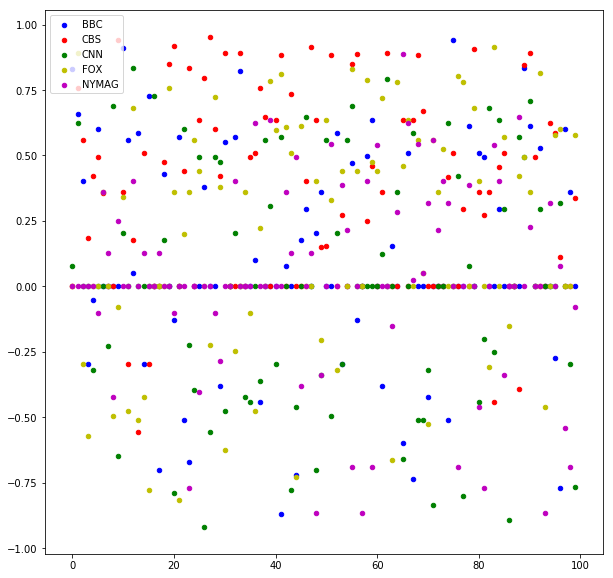

In [9]:
x = range(2)
y = range(0,2)
bar = plt.figure(figsize=(10,10))
ax1 = bar.add_subplot(111)

ax1.scatter(np.arange(len(df_bbc['compound'])),
        df_bbc['compound'],s=20,c='b',label='BBC')
ax1.scatter(np.arange(len(df_cbs['compound'])),
        df_cbs['compound'],s=20,c='r',label='CBS')
ax1.scatter(np.arange(len(df_cnn['compound'])),
        df_cnn['compound'],s=20,c='g',label='CNN')
ax1.scatter(np.arange(len(df_fox['compound'])),
        df_fox['compound'],s=20,c='y',label='FOX')
ax1.scatter(np.arange(len(df_nymag['compound'])),
        df_nymag['compound'],s=20,c='m',label='NYMAG')

plt.legend(loc='upper left');
plt.show()
bar.savefig('scatter.png')

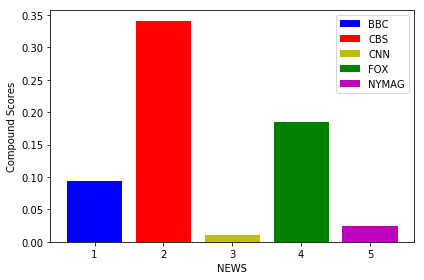

In [14]:
fig, ax = plt.subplots()

rects1 = plt.bar(1, df_bbc['compound'].mean(),
                 color='b',
                 label='BBC')
rects1 = plt.bar(2, df_cbs['compound'].mean(),
                 color='r',
                 label='CBS')
rects1 = plt.bar(3, df_cnn['compound'].mean(),
                 color='y',
                 label='CNN')
rects1 = plt.bar(4, df_fox['compound'].mean(),
                 color='g',
                 label='FOX')
rects1 = plt.bar(5, df_nymag['compound'].mean(),
                 color='m',
                 label='NYMAG')
plt.xlabel('NEWS')
plt.ylabel('Compound Scores')

plt.legend()
 
plt.tight_layout()
plt.show()
bar.savefig('bar.png')